# Download data

In [ ]:
!pip install imdb-sqlite

In [ ]:
!imdb-sqlite

2021-05-13 07:08:55,099 GET https://datasets.imdbws.com/name.basics.tsv.gz -> downloads/name.basics.tsv.gz
2021-05-13 07:08:57,698 GET https://datasets.imdbws.com/title.basics.tsv.gz -> downloads/title.basics.tsv.gz
2021-05-13 07:08:59,372 GET https://datasets.imdbws.com/title.akas.tsv.gz -> downloads/title.akas.tsv.gz
2021-05-13 07:09:05,539 GET https://datasets.imdbws.com/title.principals.tsv.gz -> downloads/title.principals.tsv.gz
2021-05-13 07:09:09,687 GET https://datasets.imdbws.com/title.episode.tsv.gz -> downloads/title.episode.tsv.gz
2021-05-13 07:09:10,784 GET https://datasets.imdbws.com/title.ratings.tsv.gz -> downloads/title.ratings.tsv.gz
2021-05-13 07:09:11,331 Populating database: imdb.db
2021-05-13 07:09:11,332 Applying schema
2021-05-13 07:09:11,333 Importing file: downloads/name.basics.tsv.gz
2021-05-13 07:09:11,333 Reading number of rows ...
2021-05-13 07:09:16,930 Inserting rows into table: people
100% 10921808/10921808 [01:57<00:00, 93250.30 rows/s]
2021-05-13 07:1

# Adult and non-adults movies

To see the difference between adults movies and normal movies we create separate dataframes:

In [ ]:
import pandas as pd
import sqlite3
import re

query = """
SELECT rating, is_adult, premiered  FROM titles
JOIN ratings
ON titles.title_id = ratings.title_id
WHERE titles.is_adult > 0
ORDER BY votes DESC
"""


con = sqlite3.connect('imdb.db')
df1 = pd.read_sql(query, con)
df1 = df1.loc[:,~df1.columns.duplicated()]

df1.head(5)



,rating,is_adult,premiered
0,5.1,1,1972.0
1,7.3,1,2005.0
2,7.7,1,2008.0
3,4.4,1,2004.0
4,6.2,1,1976.0


In [ ]:
query = """
SELECT rating, is_adult, premiered FROM titles
JOIN ratings 
ON titles.title_id = ratings.title_id
WHERE titles.is_adult < 1
ORDER BY votes DESC
"""


con = sqlite3.connect('imdb.db')
df0 = pd.read_sql(query, con)
df0 = df0.loc[:,~df0.columns.duplicated()]

df0.head(5)



,rating,is_adult,premiered
0,9.3,0,1994.0
1,9.0,0,2008.0
2,8.8,0,2010.0
3,8.8,0,1999.0
4,8.9,0,1994.0


In [ ]:
df_is_not_adult = df0.head(1000)
df_is_adult = df1.head(1000)

Visualize by creating a scatterplot with two groups of data:

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

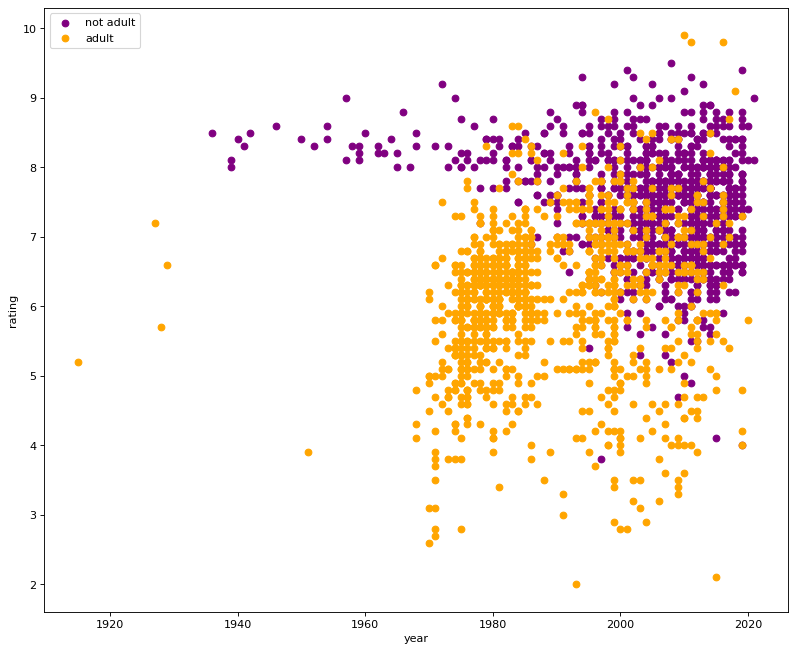

In [ ]:
year_is_not_adult = df_is_not_adult[df_is_not_adult['is_adult'] == 0]['premiered']
rating_is_not_adult = df_is_not_adult[df_is_not_adult['is_adult'] == 0]['rating']
year_is_adult = df_is_adult[df_is_adult['is_adult'] == 1]['premiered']
rating_is_adult = df_is_adult[df_is_adult['is_adult'] == 1]['rating']


plt.figure(figsize=(12,10), dpi= 80)

plt.scatter(year_is_not_adult, rating_is_not_adult, color='purple', label='not adult')
plt.scatter(year_is_adult, rating_is_adult, color='orange', label='adult')

plt.title('') 
plt.ylabel('rating')
plt.xlabel('year')
plt.legend(loc='best') 
plt.show()

# See the career path of top directors

To find out who the most popular directors in the database are we group by directors and sort rows by decresing number of votes:

In [ ]:
import pandas as pd
import sqlite3

query = """
SELECT name, AVG(rating) AS mean_rating_film FROM titles
JOIN ratings, crew, people
ON titles.title_id = ratings.title_id AND titles.title_id = crew.title_id AND crew.person_id = people.person_id
WHERE crew.category IN ('director')
GROUP BY name
ORDER BY AVG(votes) DESC
"""


con = sqlite3.connect('imdb.db')
df = pd.read_sql(query, con)
df = df.loc[:,~df.columns.duplicated()]

df_directors = df.head(10)

These are top-10 directors by popularity:

In [ ]:
directors = list(df_directors['name'])

directors

['Christopher Nolan',
 'Loveleen Tandan',
 'Quentin Tarantino',
 'Peter Jackson',
 'Lee Unkrich',
 'Chad Stahelski',
 'Adrian Molina',
 'Bob Persichetti',
 'Rodney Rothman',
 'Joe Ranft']

Getting the average ratings of top directors:

In [ ]:
import pandas as pd
import sqlite3

query = """
SELECT name, premiered, rating, primary_title FROM titles
JOIN ratings, crew, people
ON titles.title_id = ratings.title_id AND titles.title_id = crew.title_id AND crew.person_id = people.person_id
WHERE people.name IN ('Christopher Nolan',
 'Quentin Tarantino',
 'Peter Jackson',
 'Lee Unkrich',
 'Chad Stahelski',
 'Rodney Rothman',
 'Joe Ranft')
"""


con = sqlite3.connect('imdb.db')
dfall = pd.read_sql(query, con)
dfall = dfall.loc[:,~dfall.columns.duplicated()]
dfall.head(5)

,name,premiered,rating,primary_title
0,Chad Stahelski,1995,3.9,Nemesis 2: Nebula
1,Chad Stahelski,2012,7.2,Safe: The Art of the Gunfight
2,Chad Stahelski,2012,7.8,Safe: Cracking Safe
3,Chad Stahelski,2014,7.4,John Wick
4,Chad Stahelski,2017,7.5,John Wick: Chapter 2


In [ ]:
import pandas as pd
import sqlite3

query = """
SELECT name, premiered, rating, primary_title FROM titles
JOIN ratings, crew, people
ON titles.title_id = ratings.title_id AND titles.title_id = crew.title_id AND crew.person_id = people.person_id
WHERE people.name IN ('Christopher Nolan')
"""


con = sqlite3.connect('imdb.db')
dfnolan = pd.read_sql(query, con)
dfnolan = dfnolan.loc[:,~dfnolan.columns.duplicated()]
dfnolan.head(5)

,name,premiered,rating,primary_title
0,Christopher Nolan,1998,7.5,Following
1,Christopher Nolan,2000,8.4,Memento
2,Christopher Nolan,2002,7.2,Insomnia
3,Christopher Nolan,2002,7.7,180°: Christopher Nolan Interviews Al Pacino
4,Christopher Nolan,2002,5.3,Day for Night: The Making of 'Insomnia'


In [ ]:
import pandas as pd
import sqlite3

query = """
SELECT name, premiered, rating, primary_title FROM titles
JOIN ratings, crew, people
ON titles.title_id = ratings.title_id AND titles.title_id = crew.title_id AND crew.person_id = people.person_id
WHERE people.name IN ('Quentin Tarantino')
"""


con = sqlite3.connect('imdb.db')
dftarantino = pd.read_sql(query, con)
dftarantino = dftarantino.loc[:,~dftarantino.columns.duplicated()]
dftarantino.head(5)

,name,premiered,rating,primary_title
0,Quentin Tarantino,1992,8.3,Reservoir Dogs
1,Quentin Tarantino,1993,7.9,True Romance
2,Quentin Tarantino,1995,6.4,American Cinema
3,Quentin Tarantino,1994,7.3,Natural Born Killers
4,Quentin Tarantino,1994,8.9,Pulp Fiction


In [ ]:
import pandas as pd
import sqlite3

query = """
SELECT name, premiered, rating, primary_title FROM titles
JOIN ratings, crew, people
ON titles.title_id = ratings.title_id AND titles.title_id = crew.title_id AND crew.person_id = people.person_id
WHERE people.name IN ('Peter Jackson')
"""


con = sqlite3.connect('imdb.db')
dfjackson = pd.read_sql(query, con)
dfjackson = dfjackson.loc[:,~dfjackson.columns.duplicated()]
dfjackson.head(5)

,name,premiered,rating,primary_title
0,Peter Jackson,1987,6.6,Bad Taste
1,Peter Jackson,1989,6.7,Meet the Feebles
2,Peter Jackson,1992,7.5,Dead Alive
3,Peter Jackson,1994,7.3,Heavenly Creatures
4,Peter Jackson,1995,7.5,Forgotten Silver


In [ ]:
import pandas as pd
import sqlite3

query = """
SELECT name, premiered, rating, primary_title FROM titles
JOIN ratings, crew, people
ON titles.title_id = ratings.title_id AND titles.title_id = crew.title_id AND crew.person_id = people.person_id
WHERE people.name IN ('Lee Unkrich')
"""


con = sqlite3.connect('imdb.db')
dfunkrich = pd.read_sql(query, con)
dfunkrich = dfunkrich.loc[:,~dfunkrich.columns.duplicated()]
dfunkrich.head(5)

,name,premiered,rating,primary_title
0,Lee Unkrich,1999,7.9,Toy Story 2
1,Lee Unkrich,2001,8.1,"Monsters, Inc."
2,Lee Unkrich,2003,8.1,Finding Nemo
3,Lee Unkrich,2010,8.2,Toy Story 3
4,Lee Unkrich,1995,6.2,Community Service


In [ ]:
import pandas as pd
import sqlite3

query = """
SELECT name, premiered, rating, primary_title FROM titles
JOIN ratings, crew, people
ON titles.title_id = ratings.title_id AND titles.title_id = crew.title_id AND crew.person_id = people.person_id
WHERE people.name IN ('Chad Stahelski')
"""


con = sqlite3.connect('imdb.db')
dfstahelski = pd.read_sql(query, con)
dfstahelski = dfstahelski.loc[:,~dfstahelski.columns.duplicated()]
dfstahelski.head(5)

,name,premiered,rating,primary_title
0,Chad Stahelski,1995,3.9,Nemesis 2: Nebula
1,Chad Stahelski,2012,7.2,Safe: The Art of the Gunfight
2,Chad Stahelski,2012,7.8,Safe: Cracking Safe
3,Chad Stahelski,2014,7.4,John Wick
4,Chad Stahelski,2017,7.5,John Wick: Chapter 2


In [ ]:
import pandas as pd
import sqlite3

query = """
SELECT name, premiered, rating, primary_title FROM titles
JOIN ratings, crew, people
ON titles.title_id = ratings.title_id AND titles.title_id = crew.title_id AND crew.person_id = people.person_id
WHERE people.name IN ('Rodney Rothman')
"""


con = sqlite3.connect('imdb.db')
dfrothman = pd.read_sql(query, con)
dfrothman = dfrothman.loc[:,~dfrothman.columns.duplicated()]
dfrothman.head(5)

,name,premiered,rating,primary_title
0,Rodney Rothman,2004,7.0,$5.15/Hr.
1,Rodney Rothman,2005,7.6,The Apartment Episode
2,Rodney Rothman,2005,8.6,The Snow Episode
3,Rodney Rothman,1995,4.2,Episode dated 23 November 1995
4,Rodney Rothman,1996,7.0,Episode dated 19 February 1996


In [ ]:
import pandas as pd
import sqlite3

query = """
SELECT name, premiered, rating, primary_title FROM titles
JOIN ratings, crew, people
ON titles.title_id = ratings.title_id AND titles.title_id = crew.title_id AND crew.person_id = people.person_id
WHERE people.name IN ('Joe Ranft')
"""


con = sqlite3.connect('imdb.db')
dfranft = pd.read_sql(query, con)
dfranft = dfranft.loc[:,~dfranft.columns.duplicated()]
dfranft.head(5)

,name,premiered,rating,primary_title
0,Joe Ranft,1982,5.8,Fun with Mr. Future
1,Joe Ranft,1987,7.3,The Brave Little Toaster
2,Joe Ranft,1990,6.9,The Rescuers Down Under
3,Joe Ranft,1995,8.3,Toy Story
4,Joe Ranft,1998,7.2,A Bug's Life


('Christopher Nolan',
 'Quentin Tarantino',
 'Peter Jackson',
 'Lee Unkrich',
 'Chad Stahelski',
 'Rodney Rothman',
 'Joe Ranft')

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import random

Visualizing ratings of movies throughout time for each director:

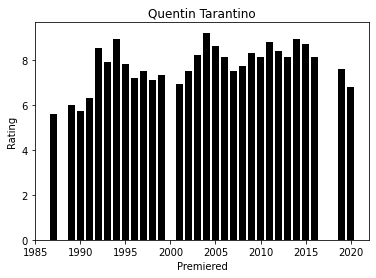

In [ ]:

X = list(dftarantino['premiered'])
Y = list(dftarantino['rating'])

DAYS = X
plt.bar(X, Y, color='black')
plt.title('Quentin Tarantino')
plt.ylabel('Rating')
plt.xlabel('Premiered')
plt.show()

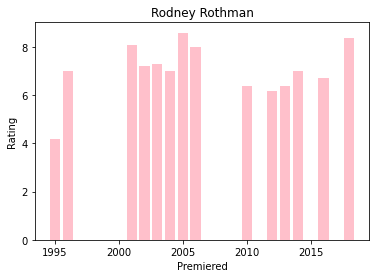

In [ ]:
X2 = list(dfrothman['premiered'])
Y2 = list(dfrothman['rating'])

YEARS = X2
plt.bar(X2, Y2, color='pink')
plt.title('Rodney Rothman')
plt.ylabel('Rating')
plt.xlabel('Premiered')
plt.show()

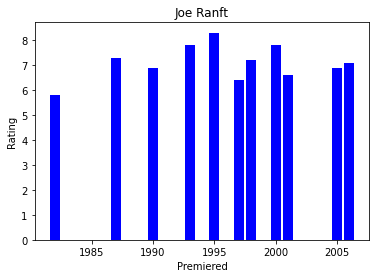

In [ ]:
X3 = list(dfranft['premiered'])
Y3 = list(dfranft['rating'])

YEARS = X3
plt.bar(X3, Y3, color='blue')
plt.title('Joe Ranft')
plt.ylabel('Rating')
plt.xlabel('Premiered')
plt.show()

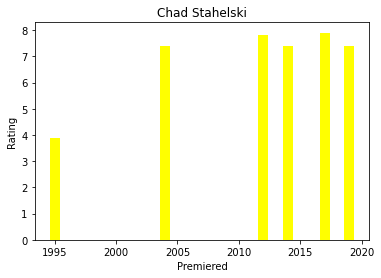

In [ ]:
X4 = list(dfstahelski['premiered'])
Y4 = list(dfstahelski['rating'])

YEARS = X4
plt.bar(X4, Y4, color='yellow')
plt.title('Chad Stahelski')
plt.ylabel('Rating')
plt.xlabel('Premiered')
plt.show()

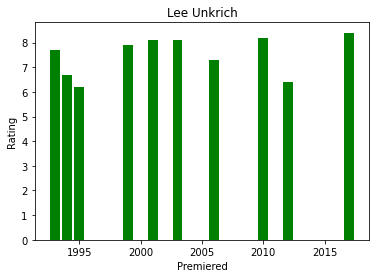

In [ ]:
X5 = list(dfunkrich['premiered'])
Y5 = list(dfunkrich['rating'])

YEARS = X5
plt.bar(X5, Y5, color='green')
plt.title('Lee Unkrich')
plt.ylabel('Rating')
plt.xlabel('Premiered')
plt.show()

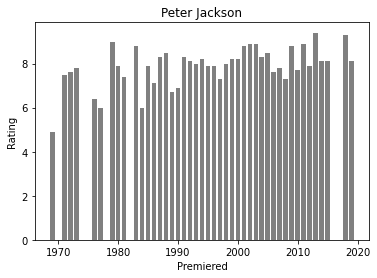

In [ ]:
X6 = list(dfjackson['premiered'])
Y6 = list(dfjackson['rating'])

YEARS = X6
plt.bar(X6, Y6, color='gray')

plt.title('Peter Jackson')
plt.ylabel('Rating')
plt.xlabel('Premiered')
plt.show()

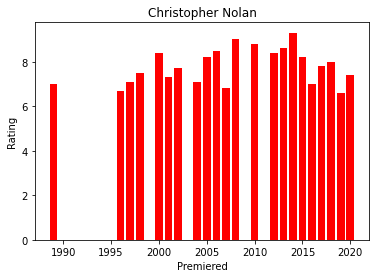

In [ ]:
X7 = list(dfnolan['premiered'])
Y7 = list(dfnolan['rating'])

YEARS = X7
plt.bar(X7, Y7, color='red')
plt.title('Christopher Nolan')
plt.ylabel('Rating')
plt.xlabel('Premiered')
plt.show()